# Numeric Digit Recognition

In [1]:
import pandas as pd
import sklearn.datasets as ds
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import the dataset and create a dataframe from it...
dataset = ds.load_digits()
numdata = pd.DataFrame(dataset.data)
numlabels = pd.Series(dataset.target)
numdata.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


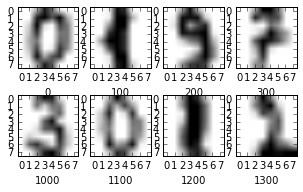

In [5]:
#plot representative examples...
fig = plt.figure(figsize=(5,3))
plt.subplots_adjust(hspace=0.1)
ax = fig.add_subplot(241)
ax.imshow(numdata.iloc[0].values.reshape(8,8),cmap='gray_r')
ax.set_xlabel('0')
ax1 = fig.add_subplot(242)
ax1.imshow(numdata.iloc[99].values.reshape(8,8),cmap='gray_r')
ax1.set_xlabel('100')
ax2 = fig.add_subplot(243)
ax2.imshow(numdata.iloc[199].values.reshape(8,8),cmap='gray_r')
ax2.set_xlabel('200')
ax3 = fig.add_subplot(244)
ax3.imshow(numdata.iloc[299].values.reshape(8,8),cmap='gray_r')
ax3.set_xlabel('300')
ax4 = fig.add_subplot(245)
ax4.imshow(numdata.iloc[999].values.reshape(8,8),cmap='gray_r')
ax4.set_xlabel('1000')
ax5 = fig.add_subplot(246)
ax5.imshow(numdata.iloc[1099].values.reshape(8,8),cmap='gray_r')
ax5.set_xlabel('1100')
ax6 = fig.add_subplot(247)
ax6.imshow(numdata.iloc[1199].values.reshape(8,8),cmap='gray_r')
ax6.set_xlabel('1200')
ax7 = fig.add_subplot(248)
ax7.imshow(numdata.iloc[1299].values.reshape(8,8),cmap='gray_r')
ax7.set_xlabel('1300')
plt.show()


<strong>K Nearest Neighbours</strong>

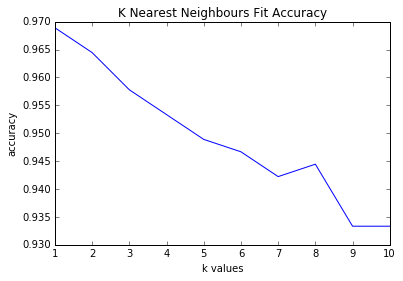

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train(features,labels,k):
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(features,labels)
    return knc
def test(model,features,labels):
    plabels = model.predict(features)
    fit = (plabels==labels)
    accuracy = fit.sum()/fit.shape[0]
    return accuracy
def cross_validate(datafeatures,datalabels,n,k):
    kf = KFold(n_splits=n)
    turnacc = []
    for train_index,test_index in kf.split(datafeatures):
        tr_feat = datafeatures.iloc[train_index]
        tr_lab = datalabels.iloc[train_index]
        test_feat = datafeatures.iloc[test_index]
        test_lab = datalabels.iloc[test_index]
        model = train(tr_feat,tr_lab,k)
        testacc = test(model,test_feat,test_lab)
        turnacc.append(testacc)
        return np.mean(turnacc)

k_values = [1,2,3,4,5,6,7,8,9,10]
kacc = []
for k in k_values:
    kacc.append(cross_validate(numdata,numlabels,4,k))
        
plt.plot(k_values,kacc)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title('K Nearest Neighbours Fit Accuracy')
plt.show()

<strong>Neural Network with one Neuron</strong>

In [ ]:
from sklearn.neural_network import MLPClassifier

def ntrain(features,labels,k):
    knc = MLPClassifier(hidden_layer_sizes = (k,),max_iter=1000)
    knc.fit(features,labels)
    return knc
def ntest(model,features,labels):
    plabels = model.predict(features)
    fit = (plabels==labels)
    accuracy = fit.sum()/fit.shape[0]
    return accuracy
def ncross_validate(datafeatures,datalabels,n,k):
    kf = KFold(n_splits=n)
    turnacc = []
    for train_index,test_index in kf.split(datafeatures):
        tr_feat = datafeatures.iloc[train_index]
        tr_lab = datalabels.iloc[train_index]
        test_feat = datafeatures.iloc[test_index]
        test_lab = datalabels.iloc[test_index]
        model = ntrain(tr_feat,tr_lab,k)
        testacc = ntest(model,test_feat,test_lab)
        turnacc.append(testacc)
        return np.mean(turnacc)

neurons = [4,8,16,32,64,128]

nacc = []

for n in neurons:
    start = time.time()
    acc = ncross_validate(numdata,numlabels,4,n)
    stop = time.time()
    print('%d neurons x3 took %d seconds and had an accuracy of %0.2f' % (n,stop-start,acc))
    nacc.append(acc)
        
plt.plot(neurons,nacc)
plt.xlabel('neurons')
plt.ylabel('accuracy')
plt.title('Single Neural Network Fit Accuracy')
plt.show()


4 neurons x3 took 2 seconds and had an accuracy of 0.57
8 neurons x3 took 2 seconds and had an accuracy of 0.93
16 neurons x3 took 1 seconds and had an accuracy of 0.94
32 neurons x3 took 1 seconds and had an accuracy of 0.93
64 neurons x3 took 27 seconds and had an accuracy of 0.96


<strong>Neural Network with two layers of Neurons</strong>

In [13]:
from sklearn.neural_network import MLPClassifier

def ntrain2(features,labels):
    knc = MLPClassifier(hidden_layer_sizes = (64,64),max_iter=1000)
    knc.fit(features,labels)
    return knc
def ntest2(model,features,labels):
    plabels = model.predict(features)
    fit = (plabels==labels)
    accuracy = fit.sum()/fit.shape[0]
    return accuracy
def ncross_validate2(datafeatures,datalabels,n):
    kf = KFold(n_splits=n)
    turnacc = []
    for train_index,test_index in kf.split(datafeatures):
        tr_feat = datafeatures.iloc[train_index]
        tr_lab = datalabels.iloc[train_index]
        test_feat = datafeatures.iloc[test_index]
        test_lab = datalabels.iloc[test_index]
        model = ntrain2(tr_feat,tr_lab)
        testacc = ntest2(model,test_feat,test_lab)
        turnacc.append(testacc)
        return np.mean(turnacc)

print('Dual Layer Accuracy:')
print(np.round(ncross_validate2(numdata,numlabels,4),3))

Dual Layer Accuracy:
0.958


<strong>Neural Network with Three Layers of Neurons</strong>

In [16]:
import time
def ntrain3(features,labels,k):
    knc = MLPClassifier(hidden_layer_sizes = (k,k,k),max_iter=1000)
    knc.fit(features,labels)
    return knc
def ntest3(model,features,labels):
    plabels = model.predict(features)
    fit = (plabels==labels)
    accuracy = fit.sum()/fit.shape[0]
    return accuracy
def ncross_validate3(datafeatures,datalabels,n,k):
    kf = KFold(n_splits=n)
    turnacc = []
    for train_index,test_index in kf.split(datafeatures):
        tr_feat = datafeatures.iloc[train_index]
        tr_lab = datalabels.iloc[train_index]
        test_feat = datafeatures.iloc[test_index]
        test_lab = datalabels.iloc[test_index]
        model = ntrain3(tr_feat,tr_lab,k)
        testacc = ntest3(model,test_feat,test_lab)
        turnacc.append(testacc)
        return np.mean(turnacc)
    
neurons = [4,8,16,32,64,128]    
for n in neurons:
    start = time.time()
    acc = ncross_validate3(numdata,numlabels,6,n)
    stop = time.time()
    print('%d neurons x3 took %d seconds and had an accuracy of %0.2f' % (n,stop-start,acc))

4 neurons x3 took 1 seconds and had an accuracy of 0.23
8 neurons x3 took 1 seconds and had an accuracy of 0.85
16 neurons x3 took 1 seconds and had an accuracy of 0.91
32 neurons x3 took 0 seconds and had an accuracy of 0.89
64 neurons x3 took 35 seconds and had an accuracy of 0.95
128 neurons x3 took 31 seconds and had an accuracy of 0.97


The accuracy of the model generally improves with complexity in the case of the neural networks, however it actually decreases in the case of the k-nearest neighbours.
The k-nearest neighbours does surprisingly well with an n of 1, however this may be due to overfitting and remains to be tested.
Added complexity certainly increases the computational time of the neural network models.

